# Probability of Detection (Pdet) generation and comparison

This notebook is a full guide on how to use the `gwsnr` package to generate the Pdet for a given Gravitational Wave (GW) signal parameters.

## Contents of this notebook

- Simple $P_{\rm det}$ calculation with default settings.

- Calculation by considering $P_{\rm det}$ as,
  - Boolean (detected if 1, not detected if 0)
    - with $\rho_{\rm obs}$ as non-central $\chi$ distribution
    - with $\rho_{\rm obs}$ as Gaussian distribution
    - with $\rho_{\rm opt}$ as Fixed SNR.
  - Probabilistic (between 0 and 1)
    - with $\rho_{\rm obs}$ as non-central $\chi$ distribution
    - with $\rho_{\rm obs}$ as Gaussian distribution

For snr generation, in this example notebook, I will use the default snr_method, i.e. 'interpolation_aligned_spins'. Please refer to the snr_generation.ipynb for more details on snr generation methods.

'pdet_kwargs' can be initialized while creating the GWSNR class object or the pdet related parameters can be passed while calling the pdet calculation method.

Note: For more details on Pdet calculation methods, please refer to the [gwsnr documentation](https://gwsnr.hemantaph.com).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gwsnr
np.random.seed(42)

gwsnr = gwsnr.GWSNR(
    gwsnr_verbose=False,
    # # 'pdet_kwargs' can be initialized while creating the GWSNR class object or the pdet related settings can be passed while calling the pdet calculation method. 
    # pdet_kwargs=dict(snr_th=10.0, snr_th_net=10.0, pdet_type='boolean', distribution_type='noncentral_chi2', include_optimal_snr=False, include_observed_snr=False) 
)

mass_1 = np.array([2,50.,100.,])
ratio = 0.9
dl = 500
# pdet with default settings 
# default settings are include_optimal_snr=False, include_observed_snr=False
pdet = gwsnr.pdet(mass_1=mass_1, mass_2=mass_1*ratio, luminosity_distance=dl, include_optimal_snr=True, include_observed_snr=True) 

print(f"Optimal SNR network: {pdet['optimal_snr_net']}")
print(f"Observed SNR network: {pdet['observed_snr_net']}")
print(f"Observed SNR network threshold : {gwsnr.pdet_kwargs['snr_th_net']}")
print(f"Pdet network ({gwsnr.pdet_kwargs['pdet_type']}, {gwsnr.pdet_kwargs['distribution_type']}) : {pdet['pdet_net']}")


Initializing GWSNR class...

psds not given. Choosing bilby's default psds
Interpolator will be loaded for L1 detector from ./interpolator_json/L1/partialSNR_dict_0.json
Interpolator will be loaded for H1 detector from ./interpolator_json/H1/partialSNR_dict_0.json
Interpolator will be loaded for V1 detector from ./interpolator_json/V1/partialSNR_dict_0.json


Optimal SNR network: [  8.32167359 100.88483044 166.09835583]
Observed SNR network: [  8.52326487 100.29907912 165.08749554]
Observed SNR network threshold : 10.0
Pdet network (boolean, noncentral_chi2) : [0 1 1]


* Get example data

In [ ]:
# get `ler` package generated GW parameters for BBH
! rm bbh_gw_params.json # remove if already exists
! wget https://raw.githubusercontent.com/hemantaph/gwsnr/refs/heads/main/tests/integration/bbh_gw_params.json

--2026-01-02 15:09:31--  https://raw.githubusercontent.com/hemantaph/gwsnr/refs/heads/main/tests/integration/bbh_gw_params.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4986213 (4.8M) [text/plain]
Saving to: ‘bbh_gw_params.json’

bbh_gw_params.json  100%[===================>]   4.75M  2.02MB/s    in 2.3s    

2026-01-02 15:09:34 (2.02 MB/s) - ‘bbh_gw_params.json’ saved [4986213/4986213]



In [103]:
# # delete the downloaded json file
# !rm bbh_gw_params.json

In [7]:
from gwsnr.utils import get_param_from_json
param_dict = get_param_from_json('bbh_gw_params.json')

## Boolean Pdet calculation

### $\rho_{\rm obs}$ as Non-Central $\chi$ distribution

In [8]:
pdet_chi2 = gwsnr.pdet(
    gw_param_dict=param_dict,
    snr_th_net=10.0,
    pdet_type='boolean',
    distribution_type='noncentral_chi2',
    include_observed_snr=True, # to include observed SNR values in the output dictionary
)
# print the first 5 pdet values
print(pdet_chi2['pdet_net'][:5])
print(pdet_chi2['observed_snr_net'][:5])

# find and print detectable fraction
detectable_fraction = np.mean(pdet_chi2['pdet_net'])
print("Detectable fraction of the population : ", detectable_fraction)

[0 0 1 0 0]
[ 3.16872665  3.63206794 13.38517257  2.50378508  2.62985054]
Detectable fraction of the population :  0.0036


### $\rho_{\rm obs}$ as Gaussian distribution

In [9]:
pdet_gauss = gwsnr.pdet(
    gw_param_dict=param_dict,
    snr_th_net=10.0,
    pdet_type='boolean',
    distribution_type='gaussian',
    include_observed_snr=True
)
# print the first 5 pdet values
print(pdet_gauss['pdet_net'][:5])
print(pdet_gauss['observed_snr_net'][:5])

# find and print detectable fraction
detectable_fraction = np.mean(pdet_gauss['pdet_net'])
print("Detectable fraction of the population : ", detectable_fraction)

[0 0 1 0 0]
[-0.0631521  -0.12540313 11.48099103 -0.82966448  0.16351613]
Detectable fraction of the population :  0.0036


### $\rho_{\rm obs}$ as Fixed SNR at $\rho_{\rm opt}$

In [11]:
pdet_optsnr = gwsnr.pdet(
    gw_param_dict=param_dict,
    snr_th_net=10.0,
    pdet_type='boolean',
    distribution_type='fixed_snr',
    include_observed_snr=True,  # here observed_snr_net will be same as optimal SNR
)
# print the first 5 pdet values
print(pdet_optsnr['pdet_net'][:5])
print(pdet_optsnr['observed_snr_net'][:5])

# find and print detectable fraction
detectable_fraction = np.mean(pdet_optsnr['pdet_net'])
print("Detectable fraction of the population : ", detectable_fraction)

[0 0 1 0 0]
[ 0.48575861  1.70508839 12.573188    0.73607282  1.12867277]
Detectable fraction of the population :  0.0032


### Visulalization and Comparison Observed SNR distributions wrt to Optimal SNR

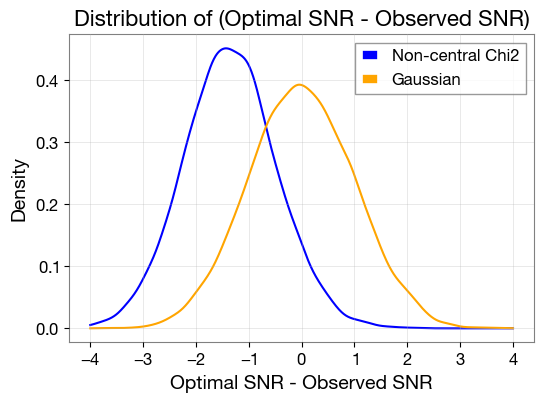

In [13]:
snr_opt = pdet_optsnr['observed_snr_net']
snr_obs_chi2 = pdet_chi2['observed_snr_net']
snr_obs_gauss = pdet_gauss['observed_snr_net']

dist1 = snr_opt - snr_obs_chi2
dist2 = snr_opt - snr_obs_gauss

# create kde plots to compare the two distributions
from scipy.stats import gaussian_kde

kde1 = gaussian_kde(dist1)
kde2 = gaussian_kde(dist2)
x = np.linspace(-4, 4, 1000)

plt.figure(figsize=(6,4))
# plt.hist(dist1, bins=30, alpha=0.5, label='Non-central Chi2', color='blue', density=True, histtype='step')
# plt.hist(dist2, bins=30, alpha=0.5, label='Gaussian', color='orange', density=True, histtype='step')
plt.plot(x, kde1(x), label='Non-central Chi2', color='blue')
plt.plot(x, kde2(x), label='Gaussian', color='orange')
plt.title('Distribution of (Optimal SNR - Observed SNR)', fontsize=16)
plt.xlabel('Optimal SNR - Observed SNR', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)
plt.show()

## Probabilistic Pdet calculation


### Non-Central $\chi$ distribution

In [14]:
pdet_chi2 = gwsnr.pdet(
    gw_param_dict=param_dict,
    snr_th_net=10.0,
    pdet_type='probability_distribution',
    distribution_type='noncentral_chi2',
    include_optimal_snr=True, # to include optimal SNR values in the output dictionary
)
# print the first 5 pdet values
print(pdet_chi2['pdet_net'][:5])
print(pdet_chi2['optimal_snr_net'][:5])

# find and print detectable fraction
detectable_fraction = np.mean(pdet_chi2['pdet_net'])
print("Detectable fraction of the population : ", detectable_fraction)

[0.00000000e+00 4.10782519e-15 9.97412959e-01 0.00000000e+00
 0.00000000e+00]
[ 0.48575861  1.70508839 12.573188    0.73607282  1.12867277]
Detectable fraction of the population :  0.0036551599068979685


### Gaussian distribution

In [15]:
pdet_gauss = gwsnr.pdet(
    gw_param_dict=param_dict,
    snr_th_net=10.0,
    pdet_type='probability_distribution',
    distribution_type='gaussian',
    include_optimal_snr=True
)
# print the first 5 pdet values
print(pdet_gauss['pdet_net'][:5])
print(pdet_gauss['optimal_snr_net'][:5])

# find and print detectable fraction
detectable_fraction = np.mean(pdet_gauss['pdet_net'])
print("Detectable fraction of the population : ", detectable_fraction)

[0.         0.         0.99496168 0.         0.        ]
[ 0.48575861  1.70508839 12.573188    0.73607282  1.12867277]
Detectable fraction of the population :  0.0033450464249214925


0.999778210302683
0.9993601412258327


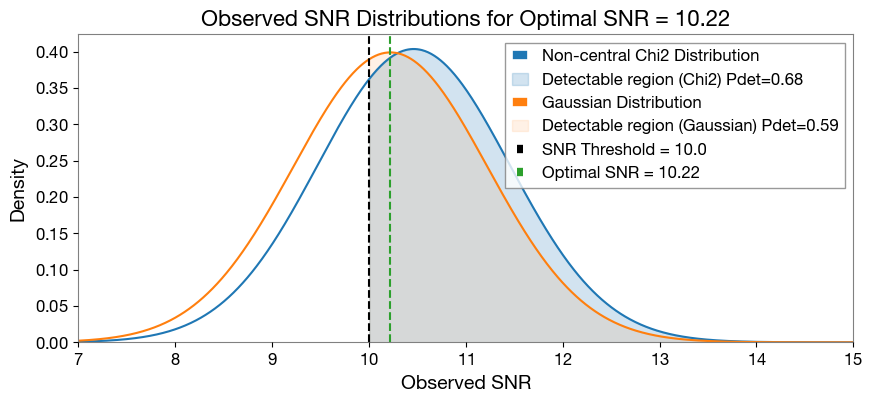

In [17]:
### Visulalization Pdet based on Probability distribution of Observed SNR wrt to Optimal SNR
from scipy.stats import norm, ncx2
min_snr = 7
max_snr = 15
x_values = np.linspace(min_snr, max_snr, 1000)
# pdet_gauss['pdet_net'] between 0.2 and 0.5
selected_indices = np.where((pdet_gauss['pdet_net'] >= 0.5) & (pdet_gauss['pdet_net'] <= 0.9))[0]
selected_index = selected_indices[0]

# Non-central Chi2 distribution case
size = 1000
nc_param = pdet_chi2['optimal_snr_net'][selected_index]**2
df = 2 * len(gwsnr.detector_list)
pdf_dist1 = ncx2.pdf(x_values**2, df=df, nc=nc_param)
print(np.trapz(pdf_dist1, x_values**2))
# normalize the pdf; or you might need to take care of Jacobian while plotting
# pdf_dist1 /= np.trapz(pdf_dist1, x_values)

# Gaussian distribution case
size = 1000
mu = pdet_gauss['optimal_snr_net'][selected_index]
sigma = 1.0  # standard deviation
pdf_dist2 = norm(loc=mu, scale=sigma)
pdf_dist2 = pdf_dist2.pdf(x_values)
print(np.trapz(pdf_dist2, x_values))
# pdf_dist2 /= np.trapz(pdf_dist2, x_values)


plt.figure(figsize=(10,4))

plt.plot(x_values, pdf_dist1 * 2 * x_values, label='Non-central Chi2 Distribution', color='C0')
plt.fill_between(x_values, 0, pdf_dist1 * 2 * x_values, where=(x_values >= 10.0), alpha=0.2, color='C0', label=f'Detectable region (Chi2) Pdet={pdet_chi2["pdet_net"][selected_index]:.2f}')

plt.plot(x_values, pdf_dist2, label='Gaussian Distribution', color='C1')
plt.fill_between(x_values, 0, pdf_dist2, where=(x_values >= 10.0), alpha=0.1, color='C1', label=f'Detectable region (Gaussian) Pdet={pdet_gauss["pdet_net"][selected_index]:.2f}')


plt.title('Observed SNR Distributions for Optimal SNR = {:.2f}'.format(pdet_gauss['optimal_snr_net'][selected_index]), fontsize=16)
# vertical line for SNR threshold
plt.axvline(x=10.0, color='k', linestyle='--', label='SNR Threshold = 10.0')
plt.axvline(x=pdet_chi2['optimal_snr_net'][selected_index], color='C2', linestyle='--', label=f'Optimal SNR = {pdet_chi2["optimal_snr_net"][selected_index]:.2f}')

plt.legend(fontsize=12, loc='upper right')
plt.xlim(7, 15)
plt.ylim(0, None)
plt.xlabel('Observed SNR', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid()
plt.show()

In [18]:
# delete the downloaded json file
!rm bbh_gw_params.json